In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import warnings
import plotly.graph_objs as go
warnings.filterwarnings("ignore")

In [2]:
Data = pd.read_csv("GrammarandProductReviews.csv")

In [3]:
Data.head(3)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   

                                                keys  \
0  602537205981,universalmusic/14331328,universal...   
1  lundbergorganiccinnamontoastricecakes/b000fvzw...   
2  lundbergorganiccinnamontoastricecakes/b000fvzw...   

                         manufacturer manufacturerNumber  \
0  Universal Music Group / Cash Money           14331328   
1                            Lundberg             574764   
2                            Lundberg             574764   

                                         name  ...   reviews.id  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  ...          NaN   
1  Lundberg Organic Cinnamon Toast Rice Cakes  ...  100209113.0   
2  Lundberg Organic Cinnamon Toast Rice Cakes  ...  100209113.0   

  reviews.numHelpful reviews.rating  \
0                0.0              5   
1                NaN              5   
2                NaN              5   

                                  reviews.sourceURLs  \
0  https://redsky.target.com/groot-domain-api/v1/...   
1   https://www.walmart.com/reviews/product/29775278   
2   https://www.walmart.com/reviews/product/29775278   

                                        reviews.text  reviews.title  \
0  i love this album. it's very good. more to the...   Just Awesome   
1  Good flavor. This review was collected as part...           Good   
2                                       Good flavor.           Good   

   reviews.userCity  reviews.userProvince reviews.username          upc  
0       Los Angeles                   NaN           Joshua  6.02537E+11  
1               NaN                   NaN        Dorothy W  73416000391  
2               NaN                   NaN        Dorothy W  73416000391  

[3 rows x 25 columns]

In [4]:
Data.shape

(71044, 25)

In [5]:
Data.dtypes

id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating            int64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
upc                      object
dtype: object

In [6]:
Data.describe()

reviews.id  reviews.numHelpful  reviews.rating
count  3.215800e+04        32508.000000    71044.000000
mean   7.944753e+07            0.410422        4.385747
std    4.842696e+07            3.574442        1.067659
min    2.187400e+04            0.000000        1.000000
25%    3.355342e+07            0.000000        4.000000
50%    7.124763e+07            0.000000        5.000000
75%    1.112628e+08            0.000000        5.000000
max    1.038227e+09          183.000000        5.000000

In [7]:
Data.cov()

reviews.id  reviews.numHelpful  reviews.rating
reviews.id          2.345170e+15       -4.828091e+07   -3.106680e+06
reviews.numHelpful -4.828091e+07        1.277664e+01   -1.397407e-02
reviews.rating     -3.106680e+06       -1.397407e-02    1.139896e+00

In [8]:
Data.corr()

reviews.id  reviews.numHelpful  reviews.rating
reviews.id            1.000000           -0.158874       -0.054355
reviews.numHelpful   -0.158874            1.000000       -0.004612
reviews.rating       -0.054355           -0.004612        1.000000

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

## Exploratory Data Analysis using Visualizations and preprocessing of data

### Is there any geographical impact of reviews and rating?

In [10]:
#Displaying the total states list
len(Data['reviews.userProvince'].unique())

53

There are total 50 states in USA, so the remaining 3 values indicates there are some wrong values present in the data, hence we need to cleanup the data

In [11]:
#Displaying all the states values
Data['reviews.userProvince'].unique()


array([nan, 'MI', 'TX', 'ME', 'OH', 'FL', 'CA', 'GA', 'ID', 'AZ', 'MD',
       'NV', 'HI', 'NY', 'VA', 'NJ', 'PA', 'KS', 'IL', 'UT', 'NM', 'IA',
       'ND', 'TN', 'MA', 'AL', 'CO', 'SC', 'DE', 'WA', 'IN', 'RI', 'NC',
       'MO', 'WV', 'NH', 'PR', 'Minimeg', 'MT', 'DrJafunkta', 'LA', 'OR',
       'KY', 'AR', 'CT', 'VT', 'OK', 'MN', 'MS', 'WI', 'SD', 'ON', 'NE'],
      dtype=object)

In [12]:
#We can see the NAN values, and 2 incorrect values present in the data, hence removind those 2 rows in the data
indexNames = Data[(Data['reviews.userProvince'] == 'Minimeg')].index
# Delete these row indexes from dataFrame
Data.drop(indexNames , inplace=True)

In [13]:
indexNames = Data[(Data['reviews.userProvince'] == 'DrJafunkta')].index
# Delete these row indexes from dataFrame
Data.drop(indexNames , inplace=True)

In [14]:
Data['reviews.userProvince'].unique()


array([nan, 'MI', 'TX', 'ME', 'OH', 'FL', 'CA', 'GA', 'ID', 'AZ', 'MD',
       'NV', 'HI', 'NY', 'VA', 'NJ', 'PA', 'KS', 'IL', 'UT', 'NM', 'IA',
       'ND', 'TN', 'MA', 'AL', 'CO', 'SC', 'DE', 'WA', 'IN', 'RI', 'NC',
       'MO', 'WV', 'NH', 'PR', 'MT', 'LA', 'OR', 'KY', 'AR', 'CT', 'VT',
       'OK', 'MN', 'MS', 'WI', 'SD', 'ON', 'NE'], dtype=object)

In [15]:
Data['reviews.rating'] = Data['reviews.rating'].apply(int)

In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71042 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71042 non-null  object 
 1   brand                 71042 non-null  object 
 2   categories            71042 non-null  object 
 3   dateAdded             71042 non-null  object 
 4   dateUpdated           71042 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71042 non-null  object 
 7   manufacturer          70901 non-null  object 
 8   manufacturerNumber    70839 non-null  object 
 9   name                  71042 non-null  object 
 10  reviews.date          70975 non-null  object 
 11  reviews.dateAdded     71042 non-null  object 
 12  reviews.dateSeen      71042 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60427 non-null  object 
 15  reviews.id         

In [17]:
sdf = Data

In [18]:
#Taking only state wise mean
sdf = Data.groupby(['reviews.userProvince'])
sdf2 = sdf['reviews.rating'].mean().to_frame(name = 'mean').reset_index()

In [19]:
sdf2.head()

reviews.userProvince      mean
0                   AL  3.625000
1                   AR  4.333333
2                   AZ  3.818182
3                   CA  3.600000
4                   CO  3.545455

### Statewise average rating 

In [20]:
import plotly.express as px
fig = px.choropleth(sdf2,
                    locations='reviews.userProvince', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='mean',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

From the above plot it could be inferred that DE state has the least average rating and NE,NY, MA,PA,KY,OK states has the highest rating.

In [21]:
#sdf = Data[Data['reviews.id'].notna()]

In [95]:
sdf = Data.groupby(['reviews.userProvince']).count()['id']

#### Bar plot to visualize the statewise ratings count

<AxesSubplot:xlabel='reviews.userProvince'>

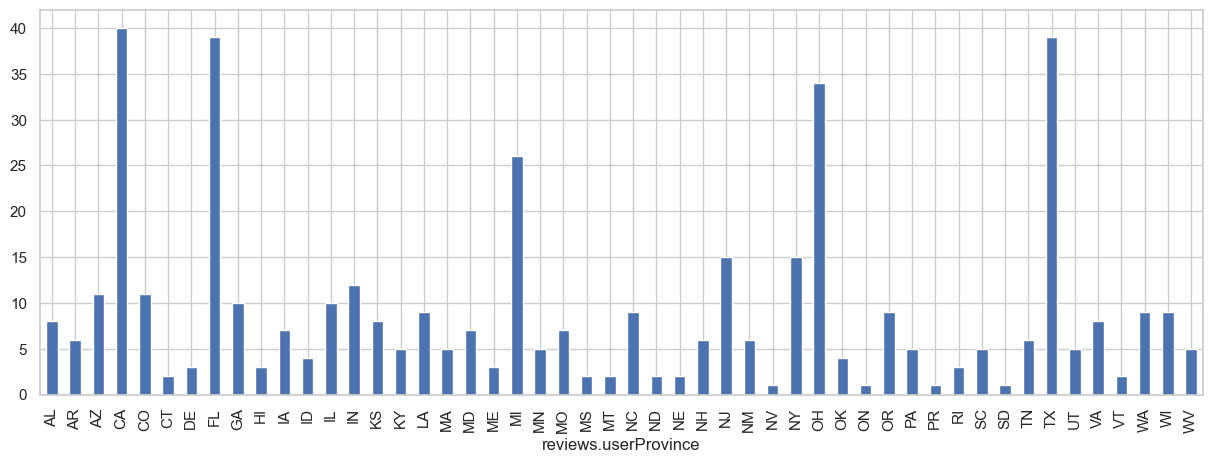

In [96]:
sdf.plot.bar(figsize=(15,5))


From the above plot, it could be inferred that CA state people have provided more ratings than the other state people.

In [24]:
print(sdf)

reviews.userProvince
AL     8
AR     6
AZ    11
CA    40
CO    11
CT     2
DE     3
FL    39
GA    10
HI     3
IA     7
ID     4
IL    10
IN    12
KS     8
KY     5
LA     9
MA     5
MD     7
ME     3
MI    26
MN     5
MO     7
MS     2
MT     2
NC     9
ND     2
NE     2
NH     6
NJ    15
NM     6
NV     1
NY    15
OH    34
OK     4
ON     1
OR     9
PA     5
PR     1
RI     3
SC     5
SD     1
TN     6
TX    39
UT     5
VA     8
VT     2
WA     9
WI     9
WV     5
Name: id, dtype: int64


In [25]:
sdf.sum()

447

**Observations of state wise analysis on the reviews and review rating**
1. Based on the choropleth map, it appears that people from certain states, such as NE, NY, MA, PA, KY, and OK, have given higher average ratings than people from other states.
2. The data suggests that California residents have provided more ratings compared to residents of other states.
3. Out of a total of 70,000 records, only 447 include information about the reviewer's state. Therefore, it is difficult to draw conclusions about the impact of state on the ratings provided based on this limited sample size.

Review ID is the unique ID of the review, hence checking whether the data has any duplicate reviews

In [26]:
len(Data['reviews.id'].unique())


31375

As per the above count, we can see that the remaining columns are the old reviews, which needs to be removed

In [104]:
df = Data


In [105]:
df = df[df['reviews.id'].notna()]

In [106]:
df['reviews.id'] = df['reviews.id'].apply(int)

In [107]:
df['reviews.dateAdded'] = pd.to_datetime(df['reviews.dateAdded'])

In [31]:
#Sorting the dataframe based on the review ID and the reviewdate
df.sort_values(by = ['reviews.id', 'reviews.dateAdded'], ascending = [True, False])

id                brand  \
1825   AVpe38Uy1cnluZ0-YuJR  Target.com Use Only   
1302   AV1YqAaMGV-KLJ3adiDj           Neutrogena   
1288   AV1YqAaMGV-KLJ3adiDj           Neutrogena   
1293   AV1YqAaMGV-KLJ3adiDj           Neutrogena   
62605  AVpjcyuHilAPnD_xNiZp  Target.com Use Only   
...                     ...                  ...   
68829  AVqkGdQ6v8e3D1O-leAl                 Sony   
68828  AVqkGdQ6v8e3D1O-leAl                 Sony   
68827  AVqkGdQ6v8e3D1O-leAl                 Sony   
68826  AVqkGdQ6v8e3D1O-leAl                 Sony   
68825  AVqkGdQ6v8e3D1O-leAl                 Sony   

                                              categories  \
1825   Movies, Music & Books,Movies,Music,All MGM Tit...   
1302   Personal Care,Sun Care,Spray-on Sunscreen SPF ...   
1288   Personal Care,Sun Care,Spray-on Sunscreen SPF ...   
1293   Personal Care,Sun Care,Spray-on Sunscreen SPF ...   
62605  Movies, Music & Books,Movies,Animation,Movies ...   
...                                                  ...   
68829  Electronics,Ways To Shop,The Well Chosen Event...   
68828  Electronics,Ways To Shop,The Well Chosen Event...   
68827  Electronics,Ways To Shop,The Well Chosen Event...   
68826  Electronics,Ways To Shop,The Well Chosen Event...   
68825  Electronics,Ways To Shop,The Well Chosen Event...   

                  dateAdded           dateUpdated          ean  \
1825   2015-11-07T09:39:07Z  2018-02-05T08:36:36Z  27616867704   
1302   2017-07-19T02:23:13Z  2018-02-05T11:28:48Z  86800870357   
1288   2017-07-19T02:23:13Z  2018-02-05T11:28:48Z  86800870357   
1293   2017-07-19T02:23:13Z  2018-02-05T11:28:48Z  86800870357   
62605  2017-01-12T04:18:55Z  2018-02-05T08:36:34Z  7.82009E+11   
...                     ...                   ...          ...   
68829  2017-03-06T14:50:40Z  2018-01-30T06:18:05Z  27242898523   
68828  2017-03-06T14:50:40Z  2018-01-30T06:18:05Z  27242898523   
68827  2017-03-06T14:50:40Z  2018-01-30T06:18:05Z  27242898523   
68826  2017-03-06T14:50:40Z  2018-01-30T06:18:05Z  27242898523   
68825  2017-03-06T14:50:40Z  2018-01-30T06:18:05Z  27242898523   

                                                    keys  \
1825   027616867704,targetcomuseonly/11334231,mgmvide...   
1302   086800870357,neutrogenawetskinsunscreenspraybr...   
1288   086800870357,neutrogenawetskinsunscreenspraybr...   
1293   086800870357,neutrogenawetskinsunscreenspraybr...   
62605  782009237112,targetcomuseonly/11364245,narutom...   
...                                                  ...   
68829  sonywirelessinearheadphoneblack/1597356,sonywi...   
68828  sonywirelessinearheadphoneblack/1597356,sonywi...   
68827  sonywirelessinearheadphoneblack/1597356,sonywi...   
68826  sonywirelessinearheadphoneblack/1597356,sonywi...   
68825  sonywirelessinearheadphoneblack/1597356,sonywi...   

                manufacturer manufacturerNumber  \
1825       MGM (Video & DVD)           11334231   
1302   Johnson & Johnson SLC          187035700   
1288   Johnson & Johnson SLC          187035700   
1293   Johnson & Johnson SLC          187035700   
62605              Viz Media           11364245   
...                      ...                ...   
68829                   Sony           51586637   
68828                   Sony           51586637   
68827                   Sony           51586637   
68826                   Sony           51586637   
68825                   Sony           51586637   

                                                    name  ...  reviews.id  \
1825                                      Clambake (dvd)  ...       21874   
1302   Neutrogena Wet Skin Sunscreen Spray Broad Spec...  ...       45492   
1288   Neutrogena Wet Skin Sunscreen Spray Broad Spec...  ...       57508   
1293   Neutrogena Wet Skin Sunscreen Spray Broad Spec...  ...       64138   
62605         Naruto:Movie:Ninja Clash In The Land (dvd)  ...       87362   
...                                                  ...  ...         ...   
68829        

In [32]:
df.head(4)

id     brand  \
1  AV14LG0R-jtxr-f38QfS  Lundberg   
2  AV14LG0R-jtxr-f38QfS  Lundberg   
3  AV16khLE-jtxr-f38VFn       K-Y   
4  AV16khLE-jtxr-f38VFn       K-Y   

                                          categories             dateAdded  \
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   

            dateUpdated          ean  \
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   
3  2018-02-05T11:25:51Z  67981934427   
4  2018-02-05T11:25:51Z  67981934427   

                                                keys manufacturer  \
1  lundbergorganiccinnamontoastricecakes/b000fvzw...     Lundberg   
2  lundbergorganiccinnamontoastricecakes/b000fvzw...     Lundberg   
3  kylovesensualitypleasuregel/b00u2whx8s,0679819...          K-Y   
4  kylovesensualitypleasuregel/b00u2whx8s,0679819...          K-Y   

  manufacturerNumber                                        name  ...  \
1             574764  Lundberg Organic Cinnamon Toast Rice Cakes  ...   
2             574764  Lundberg Organic Cinnamon Toast Rice Cakes  ...   
3        67981934427            K-Y Love Sensuality Pleasure Gel  ...   
4        67981934427            K-Y Love Sensuality Pleasure Gel  ...   

  reviews.id reviews.numHelpful reviews.rating  \
1  100209113                NaN              5   
2  100209113                NaN              5   
3  113026909                NaN              1   
4  171267657                NaN              1   

                                 reviews.sourceURLs  \
1  https://www.walmart.com/reviews/product/29775278   
2  https://www.walmart.com/reviews/product/29775278   
3  https://www.walmart.com/reviews/product/43383370   
4  https://www.walmart.com/reviews/product/43383370   

                                        reviews.text  reviews.title  \
1  Good flavor. This review was collected as part...           Good   
2                                       Good flavor.           Good   
3  I read through the reviews on here before look...   Disappointed   
4  My husband bought this gel for us. The gel cau...     Irritation   

   reviews.userCity  reviews.userProvince reviews.username          upc  
1               NaN                   NaN        Dorothy W  73416000391  
2               NaN                   NaN        Dorothy W  73416000391  
3               NaN                   NaN          Rebecca  67981934427  
4               NaN                   NaN        Walker557  67981934427  

[4 rows x 25 columns]

In [33]:
df['reviews.id'] = df['reviews.id'].astype(str)

In [34]:
print(len(df))

32158


In [35]:
#Droping the previous/old data and keeping the latest one
df = df.drop_duplicates(subset='reviews.id', keep="first")

In [36]:
print(len(df))

31374


In [37]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                      6941
keys                        0
manufacturer                0
manufacturerNumber        179
name                        0
reviews.date                0
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase         0
reviews.doRecommend      4950
reviews.id                  0
reviews.numHelpful      25061
reviews.rating              0
reviews.sourceURLs          0
reviews.text                2
reviews.title               8
reviews.userCity        31374
reviews.userProvince    31374
reviews.username            1
upc                         0
dtype: int64

Removing the unnecessary columns, such as reviews.userCity, reviews.userProvince, reviews.username,date added, dateUpdated

Removing date columns as the the date added and date updated is regarding the products date in the data base and arent having any impact on the review content.

In [38]:
df.drop(['reviews.userCity', 'reviews.userProvince','dateAdded','dateUpdated'], axis=1)

id      brand  \
1      AV14LG0R-jtxr-f38QfS   Lundberg   
3      AV16khLE-jtxr-f38VFn        K-Y   
4      AV16khLE-jtxr-f38VFn        K-Y   
5      AV16khLE-jtxr-f38VFn        K-Y   
6      AV16khLE-jtxr-f38VFn        K-Y   
...                     ...        ...   
71037  AVzRGDlw-jtxr-f3yfFH  Opti-Free   
71038  AVzRGDlw-jtxr-f3yfFH  Opti-Free   
71039  AVzRGDlw-jtxr-f3yfFH  Opti-Free   
71040  AVzRGDlw-jtxr-f3yfFH  Opti-Free   
71041  AVzRGDlw-jtxr-f3yfFH  Opti-Free   

                                              categories  \
1      Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3      Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4      Personal Care,Medicine Cabinet,Lubricant/Sperm...   
5      Personal Care,Medicine Cabinet,Lubricant/Sperm...   
6      Personal Care,Medicine Cabinet,Lubricant/Sperm...   
...                                                  ...   
71037  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71038  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71039  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71040  Personal Care,Eye & Ear Care,Eye Care,Contact ...   
71041  Personal Care,Eye & Ear Care,Eye Care,Contact ...   

                                                     ean  \
1                                            73416000391   
3                                            67981934427   
4                                            67981934427   
5                                            67981934427   
6                                            67981934427   
...                                                  ...   
71037  3,006,503,610,570,300,000,000,000,000,000,000,...   
71038  3,006,503,610,570,300,000,000,000,000,000,000,...   
71039  3,006,503,610,570,300,000,000,000,000,000,000,...   
71040  3,006,503,610,570,300,000,000,000,000,000,000,...   
71041  3,006,503,610,570,300,000,000,000,000,000,000,...   

                                                    keys manufacturer  \
1      lundbergorganiccinnamontoastricecakes/b000fvzw...     Lundberg   
3      kylovesensualitypleasuregel/b00u2whx8s,0679819...          K-Y   
4      kylovesensualitypleasuregel/b00u2whx8s,0679819...          K-Y   
5      kylovesensualitypleasuregel/b00u2whx8s,0679819...          K-Y   
6      kylovesensualitypleasuregel/b00u2whx8s,0679819...          K-Y   
...                                                  ...          ...   
71037  optifreepuremoistdisinfectingsolution10floz/b0...    Opti-Free   
71038  optifreepuremoistdisinfectingsolution10floz/b0...    Opti-Free   
71039  optifreepuremoistdisinfectingsolution10floz/b0...    Opti-Free   
71040  optifreepuremoistdisinfectingsolution10floz/b0...    Opti-Free   
71041  optifreepuremoistdisinfectingsolution10floz/b0...    Opti-Free   

      manufacturerNumber                                               name  \
1                 574764         Lundberg Organic Cinnamon Toast Rice Cakes   
3            67981934427                   K-Y Love Sensuality Pleasure Gel   
4            67981934427                   K-Y Love Sensuality Pleasure Gel   
5            67981934427                   K-Y Love Sensuality Pleasure Gel   
6            67981934427                   K-Y Love Sensuality Pleasure Gel   
...                  ...                                                ...   
71037           11014438  Opti-Free Puremoist Disinfecting Solution 10fl Oz   
71038           11014438  Opti-Free Puremoist Disinfecting Solution 10fl Oz   
71039           11014438  Opti-Free Puremoist Disinfecting Solution 10fl Oz   
71040           11014438  Opti-Free Puremoist Disinfecting Solution 10fl Oz   
71041           11014438  Opti-Free Puremoist Disinfecting Solution 10fl Oz   

                   reviews.date         reviews.dateAdded  ...  \
1      2017-07-09T00:00:00.000Z 2017-09-23 02:53:06+00:00  ...   
3      2016-01-06T00:00:00.000Z 2017-09-11 17:13:57+00:00  ...   
4      2016-12-21T00:00:00.000Z 2017-09-11 17:13:57+00

In [39]:
df = df.dropna(subset = ['reviews.text'])

In [108]:
len(df)

32158

### Most used words in the genuine review

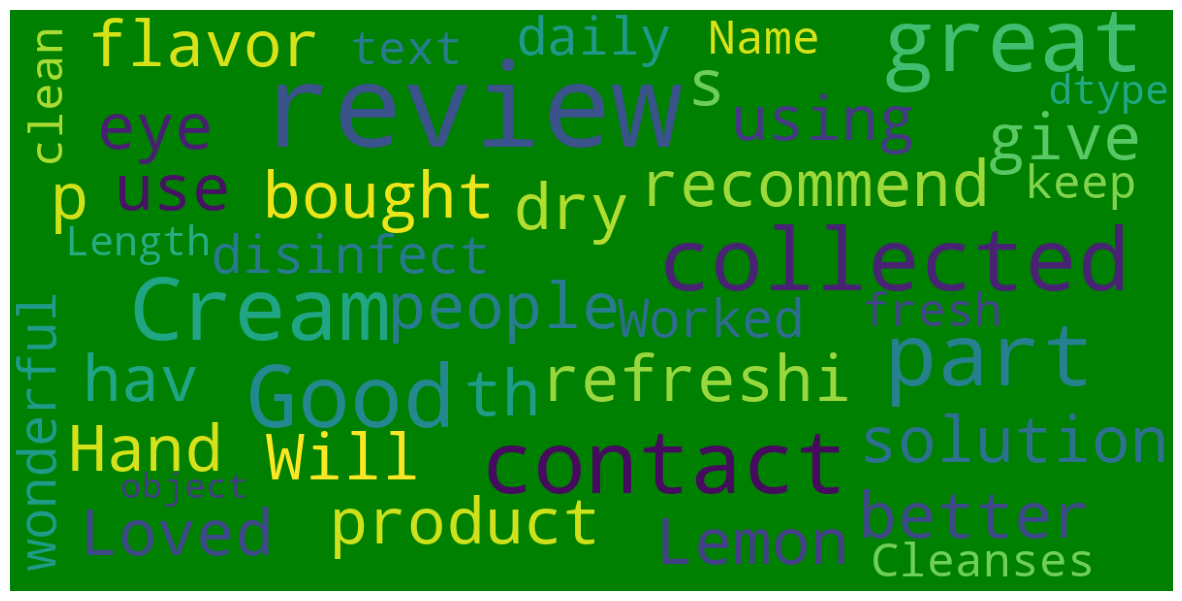

In [44]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def dispwordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='Green',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

dispwordcloud(df.loc[df['reviews.didPurchase'] == True, 'reviews.text'])

### Most used words in the fake review

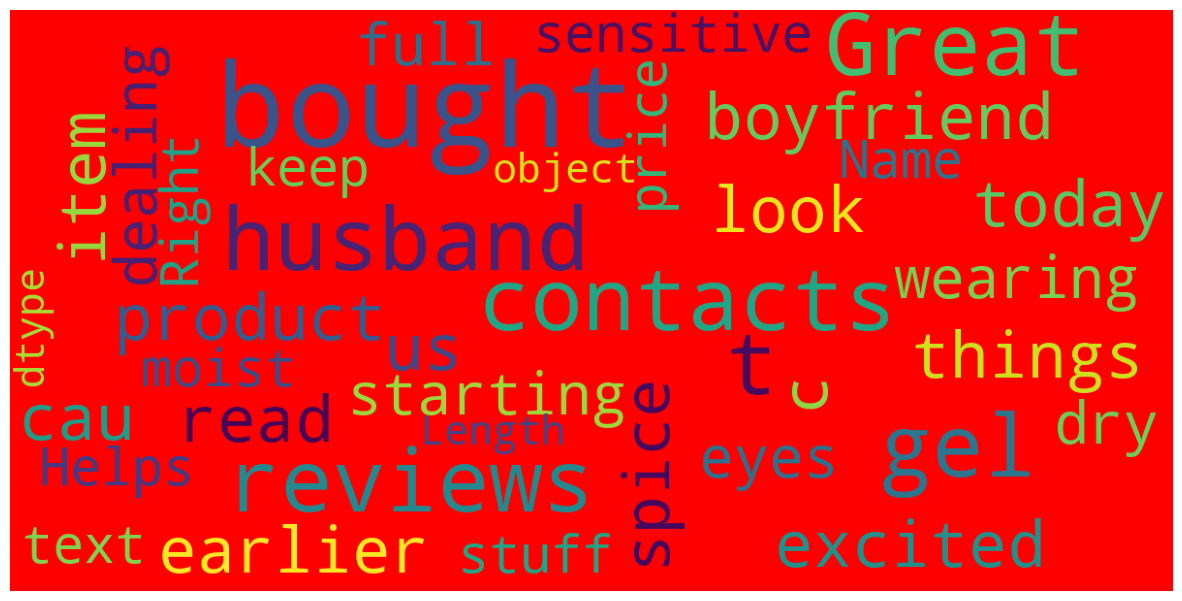

In [46]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def dispwordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='Red',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

dispwordcloud(df.loc[df['reviews.didPurchase'] == False, 'reviews.text'])

### Rating distribution for the reviews

In [47]:
import plotly.offline as py

In [48]:
cnt_srs = df['reviews.rating'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Reds',
        reversescale = True
    ),
)

layout = dict(
    title='Ratings distribution',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratings")

In [49]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')

In [50]:
df['no_stopwords'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw_nltk)]))


In [51]:
df['len_review'] = df['no_stopwords'].apply(lambda x: len(x.split()))

In [52]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [53]:
y0 = df.loc[df['reviews.rating'] == 5]['len_review']
y1 = df.loc[df['reviews.rating'] == 4]['len_review']
y2 = df.loc[df['reviews.rating'] == 3]['len_review']
y3 = df.loc[df['reviews.rating'] == 2]['len_review']
y4 = df.loc[df['reviews.rating'] == 1]['len_review']


trace0 = go.Box(
    y=y0,
    name = 'Rating 5',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Rating 4',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Rating 3',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Rating 2',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Rating 1',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Review length Boxplot of Ratings"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Review Length Boxplot of Ratings")

<AxesSubplot:xlabel='reviews.didPurchase', ylabel='count'>

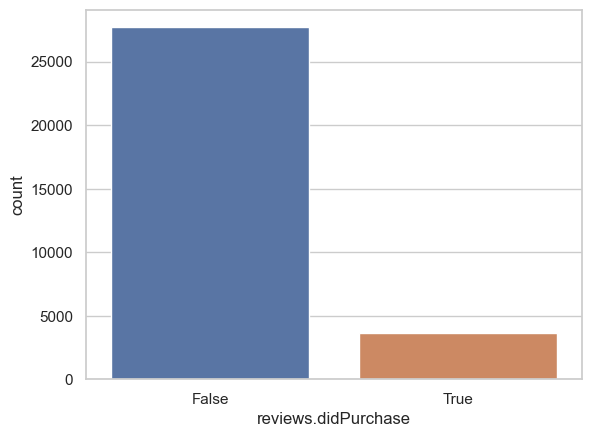

In [54]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["reviews.didPurchase"])

In [55]:
y0 = df.loc[df['reviews.didPurchase'] == True]['len_review']
y1 = df.loc[df['reviews.didPurchase'] == False]['len_review']


trace0 = go.Box(
    y=y0,
    name = 'Genuine reviews',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Fake reviews',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title = "Review length Boxplot of Genuine/Fake reviews"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Review length Boxplot of Genuine/Fake reviews")

In [109]:
df['reviews.title'].unique()

array(['Good', 'Disappointed', 'Irritation', ..., 'Review: Excellent',
       'Worth every penny.', 'Solves the problem'], dtype=object)

<AxesSubplot:>

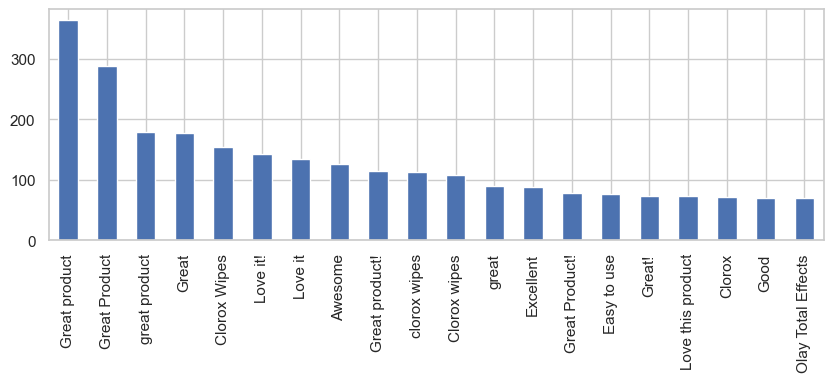

In [114]:
df['reviews.title'].value_counts().head(20).plot.bar(figsize = (10,3))

<AxesSubplot:>

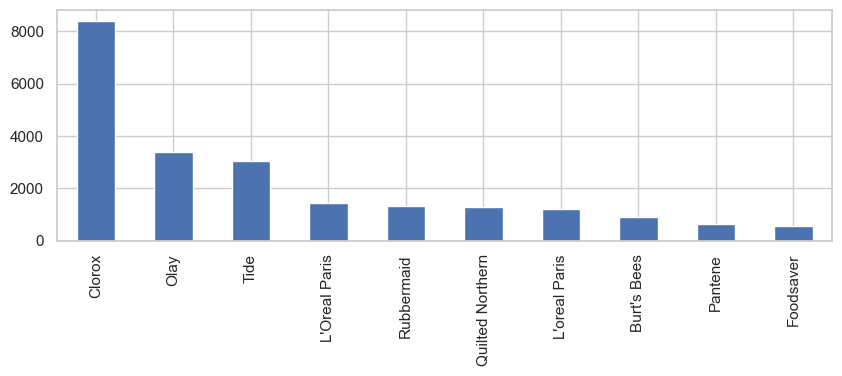

In [112]:
#brand
df['brand'].value_counts().head(10).plot.bar(figsize = (10,3))

- It is evident that Clorox stands out as a leading brand, outperforming other brands with its high customer ratings and maximum sales figures
- Universal Home Video holds the position of the second most recognized brand on a scale of 1 to 10 brands.

<AxesSubplot:>

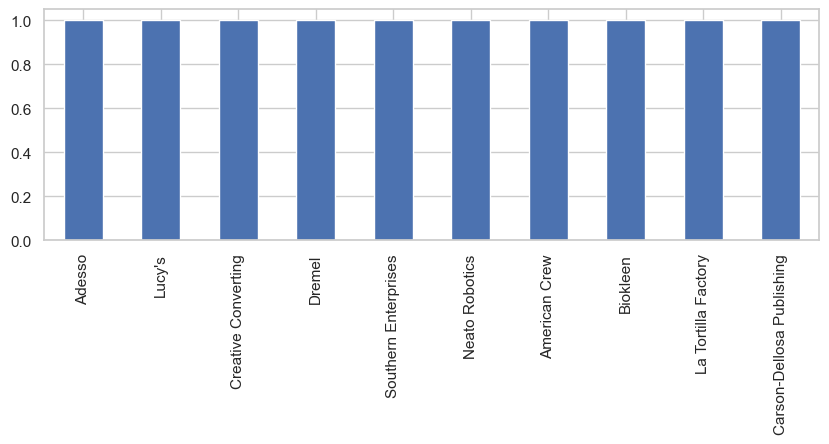

In [113]:
df['brand'].value_counts().tail(10).plot.bar(figsize = (10,3))

<AxesSubplot:>

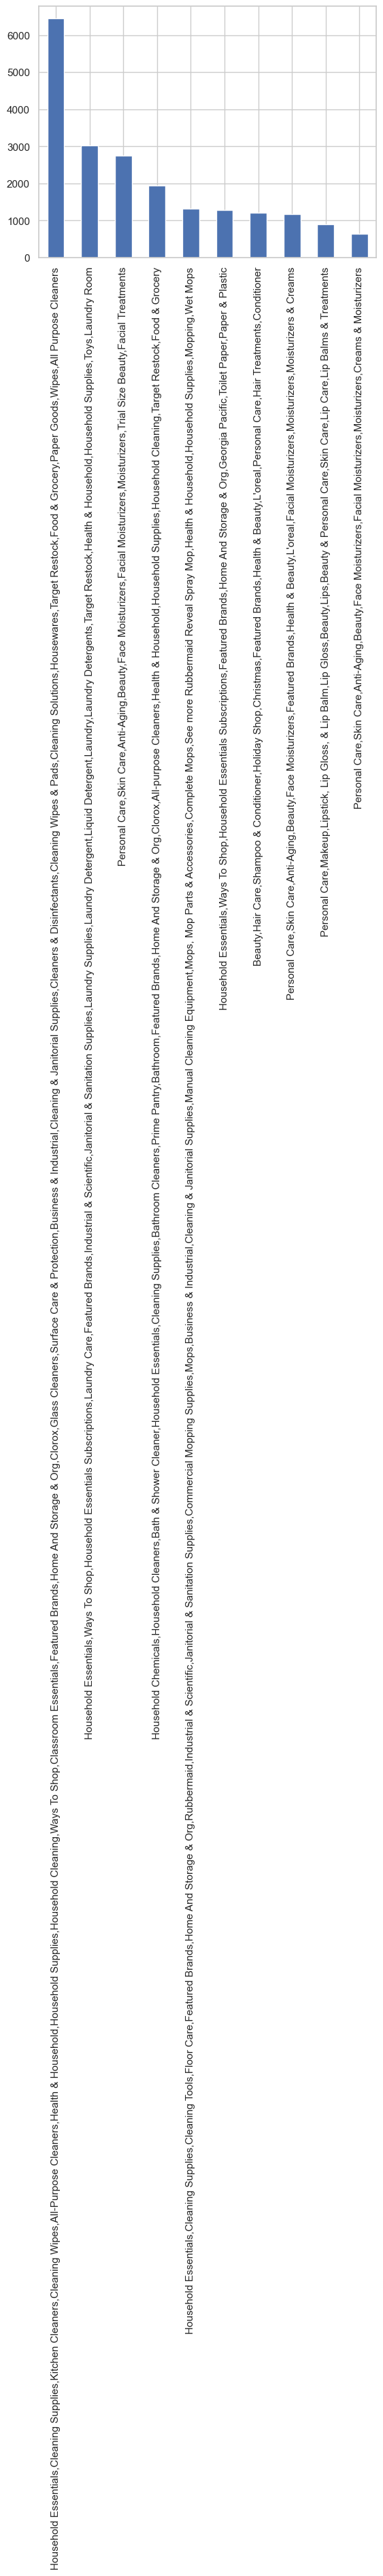

In [115]:
df['categories'].value_counts().head(10).plot.bar()

<AxesSubplot:>

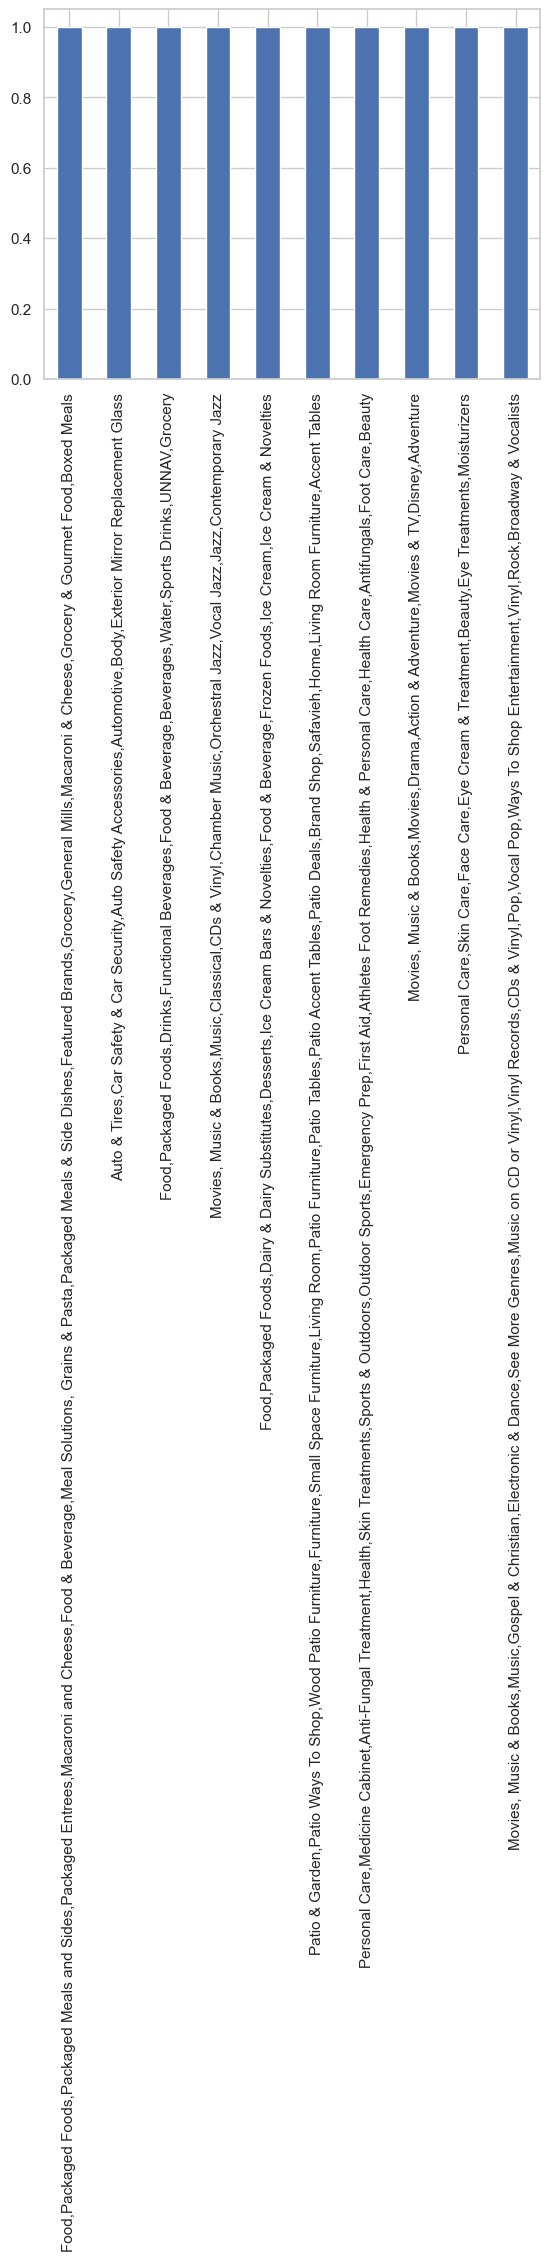

In [67]:
Data['categories'].value_counts().tail(10).plot.bar(rot = 90)

In [68]:
Data['dateAdded']

0        2017-07-25T00:52:42Z
1        2017-07-25T05:16:03Z
2        2017-07-25T05:16:03Z
3        2017-07-25T16:26:19Z
4        2017-07-25T16:26:19Z
                 ...         
71039    2017-06-22T18:37:24Z
71040    2017-06-22T18:37:24Z
71041    2017-06-22T18:37:24Z
71042    2017-06-28T15:23:21Z
71043    2017-06-28T15:35:50Z
Name: dateAdded, Length: 71042, dtype: object

In [69]:
Data['dateAdded'] = pd.to_datetime(Data['dateAdded'])

In [70]:
Data['dateUpdated']

0        2018-02-05T08:36:58Z
1        2018-02-05T11:27:45Z
2        2018-02-05T11:27:45Z
3        2018-02-05T11:25:51Z
4        2018-02-05T11:25:51Z
                 ...         
71039    2018-02-05T11:28:36Z
71040    2018-02-05T11:28:36Z
71041    2018-02-05T11:28:36Z
71042    2018-02-05T10:19:41Z
71043    2018-02-05T10:21:34Z
Name: dateUpdated, Length: 71042, dtype: object

In [71]:
Data['dateUpdated'] = pd.to_datetime(Data['dateUpdated'])

In [72]:
(Data['dateUpdated'] - Data['dateAdded']).dt.days

0        195
1        195
2        195
3        194
4        194
        ... 
71039    227
71040    227
71041    227
71042    221
71043    221
Length: 71042, dtype: int64

In [73]:
Data['daystakentoupdate'] = (Data['dateUpdated'] - Data['dateAdded']).dt.days

<AxesSubplot:ylabel='Frequency'>

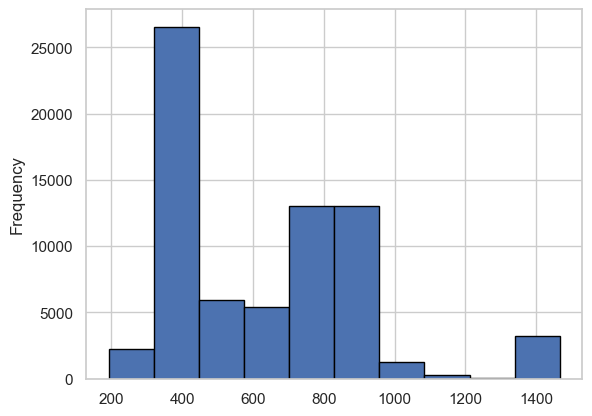

In [74]:
Data['daystakentoupdate'].plot(kind='hist', edgecolor='black')

<AxesSubplot:xlabel='daystakentoupdate', ylabel='Count'>

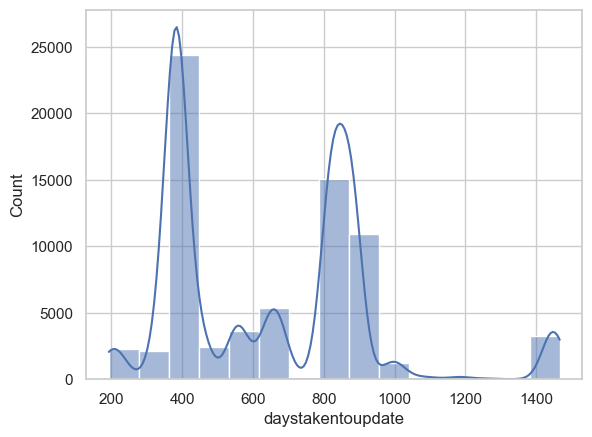

In [75]:
sns.histplot(Data['daystakentoupdate'],kde = True ,bins = 15)

In [76]:
top_brands = df['brand'].value_counts().sort_values(ascending = False)[0:10].index.to_list()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


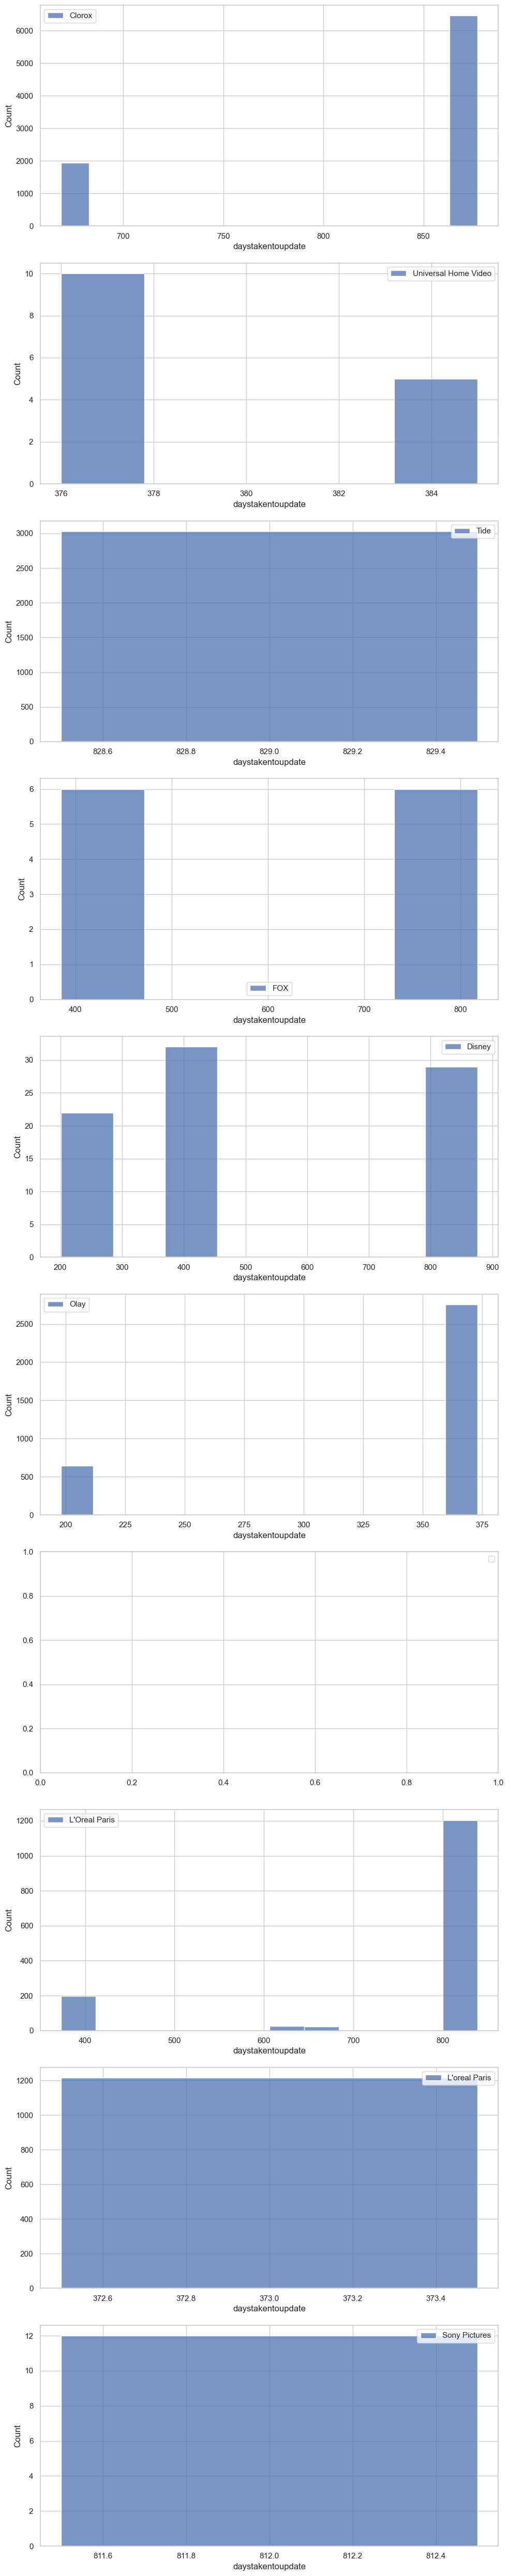

In [116]:
fig, ax = plt.subplots(len(top_brands),1, figsize = (10, len(top_brands)*5))
i = 0
for brand in top_brands:
    sns.histplot(data = df[df['brand'] == brand], x = 'daystakentoupdate', ax = ax[i], label = brand)
    ax[i].legend(loc = 'best')
    i += 1
    
plt.tight_layout()

In [119]:
df['manufacturer'].nunique()

298

<AxesSubplot:>

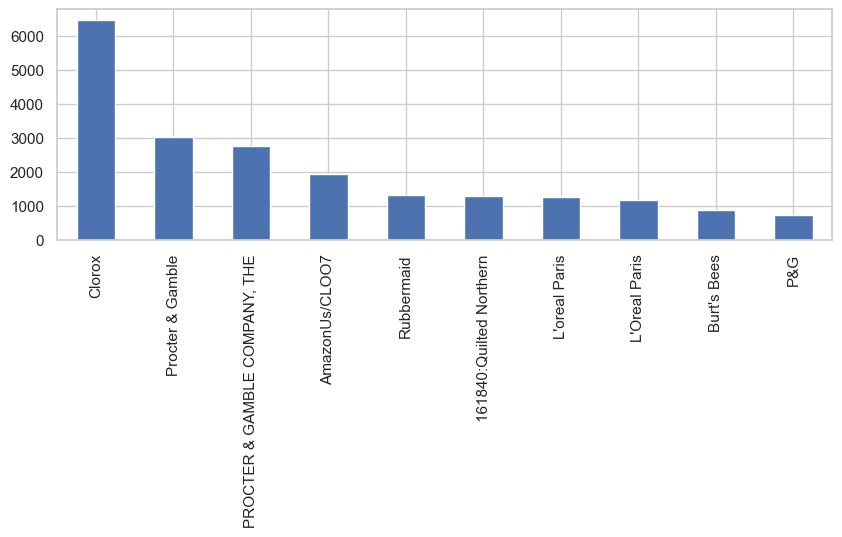

In [120]:
df['manufacturer'].value_counts().head(10).plot.bar(figsize = (10,3))

<AxesSubplot:>

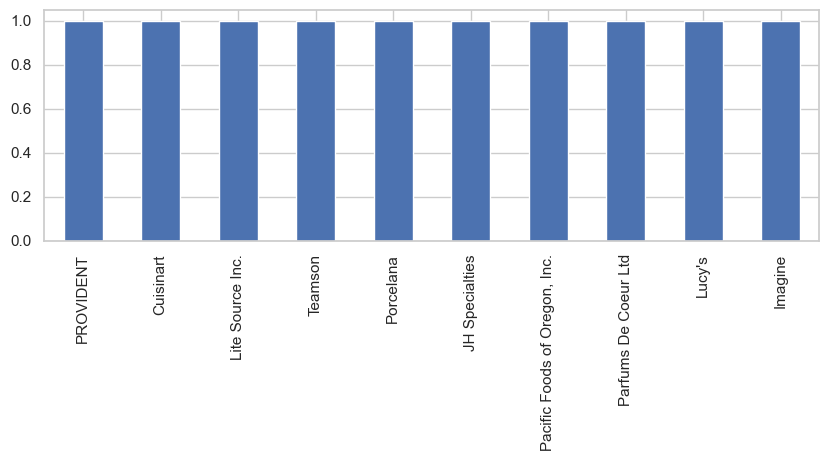

In [121]:
df['manufacturer'].value_counts().tail(10).plot.bar(figsize = (10,3))

In [122]:
# Function which returns DataFrame containing count and percentage of null values for each column
def null(dataframe):
    temp_series = dataframe.isna().sum(axis = 0)
    df_null = pd.DataFrame([temp_series, round(temp_series * 100/ dataframe.shape[0], 2)], index = ['Count', 'Percentage']).T.sort_values('Percentage', ascending = False)
    return df_null

In [123]:
null(df)

Count  Percentage
reviews.userProvince  32158.0      100.00
reviews.userCity      32158.0      100.00
reviews.numHelpful    25839.0       80.35
ean                    7023.0       21.84
reviews.doRecommend    4967.0       15.45
manufacturerNumber      179.0        0.56
reviews.title             8.0        0.02
reviews.text              2.0        0.01
id                        0.0        0.00
upc                       0.0        0.00
reviews.username          1.0        0.00
reviews.sourceURLs        0.0        0.00
reviews.rating            0.0        0.00
reviews.id                0.0        0.00
reviews.didPurchase       0.0        0.00
brand                     0.0        0.00
reviews.dateSeen          0.0        0.00
reviews.dateAdded         0.0        0.00
reviews.date              0.0        0.00
name                      0.0        0.00
manufacturer              0.0        0.00
keys                      0.0        0.00
dateUpdated               0.0        0.00
dateAdded                 0.0        0.00
categories                0.0        0.00
daystakentoupdate         0.0        0.00